# **LetsGrowMore**
### Beginner Level Task : Data Science
#### Author: Anshul Chaurasiya
---

STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM
###### This task is determined to solve the problem of Stock Prices Prediction by stacked Long-Short Term Memory (LSTM), by predicting the future values as it is very valuable but extremely hard for humans to predict on their own.

Dataset : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install fsspec
import fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#LOADING DATASET
data = pd.read_csv('stock.csv')
training_set = data.iloc[:, 1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,7/27/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,7/26/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,7/23/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,7/22/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,7/21/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data_close= data['Close']

In [ ]:
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

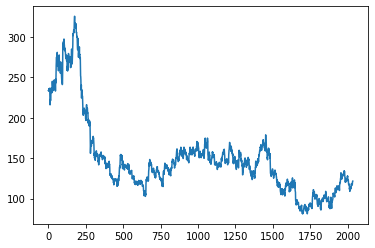

In [ ]:
plt.plot(data_close)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

### PRE-PROCESSING

#### **Data Normalization**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [ ]:
data_close.shape

(2035, 1)

In [ ]:
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


**Splitting the dataset into Train and Test sets**

In [ ]:
training_size = int(len(data_close)* 0.75)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size, :], data_close[training_size: len(data_close), :1]

In [ ]:
def create_dataset(dataset, time_step = 1):
   dataX, dataY = [], []
   for i in range(len(dataset) - time_step -1):
     a = dataset[i:(i+time_step), 0]
     dataX.append(a)
     dataY.append(dataset[i+time_step, 0])
     return np.array(dataX), np.array(dataY)


In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

MODEL BUILDING

In [ ]:
#pip install keras

In [ ]:
#create the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.6390 - val_loss: 0.0071
Epoch 2/100
1/1 [==============================] - 0s 225ms/step - loss: 0.4877 - val_loss: 0.0020
Epoch 3/100
1/1 [==============================] - 0s 217ms/step - loss: 0.3426 - val_loss: 1.0779e-05
Epoch 4/100
1/1 [==============================] - 0s 218ms/step - loss: 0.1987 - val_loss: 0.0046
Epoch 5/100
1/1 [==============================] - 0s 252ms/step - loss: 0.0692 - val_loss: 0.0246
Epoch 6/100
1/1 [==============================] - 0s 234ms/step - loss: 4.7698e-04 - val_loss: 0.0703
Epoch 7/100
1/1 [==============================] - 0s 237ms/step - loss: 0.0631 - val_loss: 0.0971
Epoch 8/100
1/1 [==============================] - 0s 225ms/step - loss: 0.1093 - val_loss: 0.0905
Epoch 9/100
1/1 [==============================] - 0s 238ms/step - loss: 0.0756 - val_loss: 0.0701
Epoch 10/100
1/1 [==============================] - 0s 210ms/step - loss: 0.0281 - val_loss: 0.0501
Ep

In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
train_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

179.55643198848549

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

0.2721713869010701

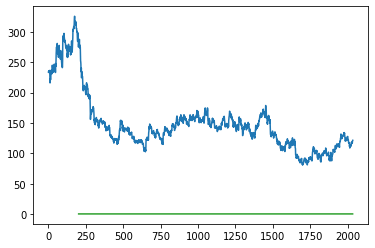

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+ look_back, :]= train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+ (look_back * 2) +1:len(data_close)-1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predict the next 30 days stock price

In [ ]:
len(test_data), x_test.shape

(509, (1, 100, 1))

In [ ]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input= x_input.reshape((1, n_steps, 1))
      yhat = model.predict(x_input, verbose=0)
      print("{} day input {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
    else:
       x_input = x_input.reshape((1,n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist())
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

print(lst_output)    

0 day input [0.14011438 0.13888889 0.13541667 0.14011438 0.1380719  0.13071895
 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007 0.15910948
 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621
 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458
 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.152

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
df3 = data_close.tolist()
df3.extend(lst_output)

In [ ]:
len(data_close)

2035

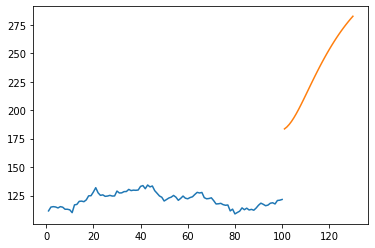

In [ ]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))